## Growth of Federal debt and its burden on the US population

We examine government debt in real (inflation-adjusted) terms, 
and the current Federal debt per capita in the United States.

As of 2017Q2:

- Federal debt is \$61,480 per American (including children and seniors).
- Federal debt is \$99,170 per worker (excluding the unemployed).
- Average maturity of Treasury bonds is 5.73 years.
- Interest rate on Federal debt is approximately 2.15%.

Government debt per capita will more than double over 14 years 
in real terms, given current annualized geometric mean rate of +5.13%.

---

Shortcut to this notebook: https://git.io/debtpop

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
     
*CHANGE LOG*

    2017-11-14  Appendix 1: Average Maturity of Treasury Bonds
    2017-11-13  Update preamble to p6.15.1223d and the data, esp. for CSC 223.
    2015-01-16  Code review.
    2014-08-16  First version.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223d :: Settings and system details
from __future__ import absolute_import, print_function, division
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.13
 ::  IPython 5.1.0
 ::  jupyter_core 4.2.1
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.11.0
 ::  scipy 0.17.0
 ::  sympy 1.0
 ::  pandas 0.19.2
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.17.0722 develop
 ::  Timestamp: 2017-11-14T15:42:52Z
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


### Retrieving the data

The source of the data is FRED which is a public server 
operated by the Federal Reserve Bank of St. Louis.

Details on the individual series are covered in our Python module: 
[yi_fred.py](https://github.com/rsvp/fecon235/blob/master/lib/yi_fred.py) 
and it also explains useful transformations on raw data 
for financial economics. 

In [3]:
#  Federal debt monthly (resampled from original quarterly series):
debt = get( m4debt )

In [4]:
#  See just the tail end of the debt time-series:
tail( debt )

                     Y
T                     
2016-10-01  19976827.0
2016-11-01  19933358.0
2016-12-01  19889889.0
2017-01-01  19846420.0
2017-02-01  19845798.0
2017-03-01  19845176.0
2017-04-01  19844554.0

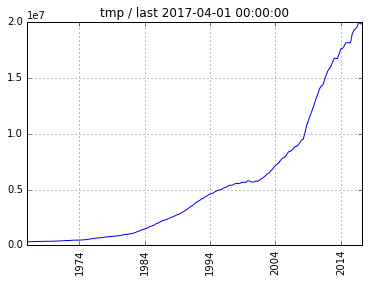

In [5]:
plot( debt )
#  This series is denominated in millions of dollars,
#  so we are looking at Federal debt around 
#  1.8 * 10^7 * 10^6 = $18 trillion circa 2014Q3.
#  tail() indicates $19.84 trillion circa 2017Q2.

In [6]:
#  Deflator is an aggregated monthly time-series,
#  derived from core and headline versions of both CPI and PCE, 
#  normalized to 1 at the most current point:
defl = get( m4defl )

In [7]:
tail( defl )

                   Y
T                   
2017-03-01  1.008585
2017-04-01  1.006966
2017-05-01  1.007095
2017-06-01  1.006415
2017-07-01  1.005338
2017-08-01  1.002943
2017-09-01  1.000000

In [8]:
#  Real debt is defined by...
rdebt = todf( defl * debt )
#  ... in terms of _current_ dollars.

#  Pandas will align the timestamps between the two series 
#  to correctly perform the multiplication.

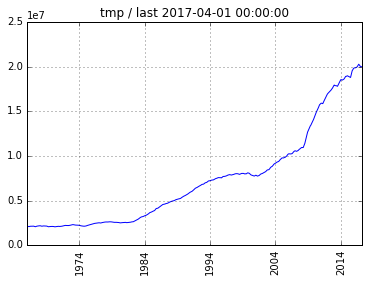

In [9]:
#  Plot real debt:
plot( rdebt )

In [10]:
#  Total population of the USA:
pop = get( m4pop )

In [11]:
#  Real debt per capita:
rdebtcap = todf( rdebt / pop )

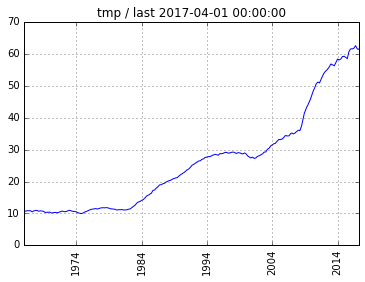

In [12]:
#  Plot real debt per American...
plot( rdebtcap )
#  ... shown in thousands of dollars.

***In current dollars***, each American (including children and seniors) 
incurred Federal debt of around \$10,000 before the 1980s. 
Then there is a steady climb to around \$35,000 in 2008. 
Thereafter, it is seen **rocketing** (more than doubling since 2002) 
to over $60,000. 

### Computing geometric mean rates

Here we use a feature of the pandas DataFrame, 
called *index slicing*, to study different regimes.

In [13]:
##  What does gemrat() compute?
##  [geometric mean rate, arithmetic mean rate, volatility, 
##   kurtosis, yearly factor for annualization, sample size]

#  gemrat??  # Uncomment to inspect the function.

In [14]:
gemrat( rdebtcap[:'2002-01-01'], yearly=12 )

[2.592800173927734,
 2.6088053152349113,
 1.8119127705741984,
 3.4485312228497524,
 12,
 432]

In [15]:
gemrat( rdebtcap['2002-01-01':], yearly=12 )

[5.129853393980599,
 5.1435435778879377,
 1.6962579494616916,
 4.7146215771006936,
 12,
 183]

Through 2002, the *geometric* growth rate of real debt per capita was +2.59%. 
Since 2002, that rate has increased to +5.13% per annum. 

(The underlying series is also becoming increasingly leptokurtotic 
since Pearson kurtosis should be 3 for a Gaussian.)

In [16]:
#  To confirm doubling over 14 years at the geometric rate of 5.13% per annum:
1.0513 ** 14

2.014527971014615

**Government debt per capita will more than double over 14 years 
in real terms, given current annualized geometric mean rate of +5.13%.**

### Federal debt is currently \$61,480 per capita. 

In [17]:
#  Most recent:
tail( rdebtcap )

                    Y
T                    
2016-10-01  62.598000
2016-11-01  62.347526
2016-12-01  62.054464
2017-01-01  61.646121
2017-02-01  61.523670
2017-03-01  61.616266
2017-04-01  61.484023

In [18]:
#  Prorate to only WORKERS:
tailvalue(rdebtcap) / 0.62

99.16777878148672

Assuming 62% of the population are workers, see 
[fred-gdp-wage.ipynb](https://git.io/gdpwage), 
**each worker carries approximately $99,170 of Federal debt**. 
That figure is equivalent to more than two years of average wage income. 

---

### Appendix 1: Average Maturity of Treasury Bonds

The US government debt is securitized by Treasury Bills and Bonds 
which are issued at various maturities.
The weighted average maturity *statistically* summarizes 
the "due date" on which the principal must be repaid, 
and it can serve to estimate a single interest rate 
on the US debt (see Treasury yield curve).
Of course, new Treasury obligations are periodically
issued which rolls over the US government debt into the future.

In [19]:
#  Get weighted average maturity of 
#  "Total Outstanding Treasury Marketable Securities",
#  monthly time-series from the US Treasury, 
#             via Quandl code:
avmat = get( 'USTREASURY/AVMAT' )
#  ... expressed in number of months.

In [20]:
#  Most recently available:
tail( avmat )

                    Y
T                    
2015-09-30  69.808297
2015-10-31  70.000000
2015-11-30  69.000000
2015-12-31  69.000000
2016-01-31  69.310000
2016-02-29  69.000000
2016-03-31  68.810000

In [21]:
#  Just the LATEST avmat, expressed in YEARS:
tailvalue(avmat) / 12.

5.734166666666667

[WSJ Treasury quotes](http://www.wsj.com/mdc/public/page/2_3020-treasury.html?mod=mdc_bnd_pglnk)
provides the following:

```
Maturity       Coupon     Yield
1/31/2023      1.750      2.117
2/15/2023      2.000      2.117
2/15/2023      7.125      2.090
2/28/2023      1.500      2.122
3/31/2023      1.500      2.132
4/30/2023      1.625      2.141
5/15/2023      1.750      2.146
5/31/2023      1.625      2.151
6/30/2023      1.375      2.159
7/31/2023      1.250      2.162
8/15/2023      2.500      2.154
8/15/2023      6.250      2.132
8/31/2023      1.375      2.164
9/30/2023      1.375      2.176
10/31/2023     1.625      2.177
11/15/2023     2.750      2.177
11/30/2023     2.125      2.182
12/31/2023     2.250      2.199
```

So we can estimate the **interest rate on the US debt
to be approximately 2.15%.**

The typical American worker thus implicitly 
owes \$2,130 per year just in interest expenses 
(on principal amount of \$99,170)
to maintain the national debt.